In [89]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import PIL
import pathlib
from pathlib import Path
import os
import cv2
print (tf.__version__)
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D,Rescaling
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import pandas as pd

2.9.0


In [90]:
def shape(dataset):
    dataset_to_numpy = list(dataset.as_numpy_iterator())
    shape = tf.shape(dataset_to_numpy)
    print(shape)

In [91]:
directory = 'MathSymbols'
img_height = 45
img_width = 45
batch_size = 128

In [92]:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='grayscale',
    batch_size=batch_size,
    image_size=(45, 45),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 375974 files belonging to 82 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 45, 45, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [93]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'MathSymbols',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(45, 45),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  'MathSymbols',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(45, 45),
  batch_size=batch_size)

Found 375974 files belonging to 82 classes.
Using 300780 files for training.
Found 375974 files belonging to 82 classes.
Using 75194 files for validation.


In [94]:
class_names = train_ds.class_names
print(class_names)
class_names1 = val_ds.class_names
print (class_names1)
print (len(class_names))

['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos', 'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan', 'theta', 'times', 'u', 'v', 'w', 'y', 'z', '{', '}']
['!', '(', ')', '+', ',', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'C', 'Delta', 'G', 'H', 'M', 'N', 'R', 'S', 'T', 'X', '[', ']', 'alpha', 'ascii_124', 'b', 'beta', 'cos', 'd', 'div', 'e', 'exists', 'f', 'forall', 'forward_slash', 'gamma', 'geq', 'gt', 'i', 'in', 'infty', 'int', 'j', 'k', 'l', 'lambda', 'ldots', 'leq', 'lim', 'log', 'lt', 'mu', 'neq', 'o', 'p', 'phi', 'pi', 'pm', 'prime', 'q', 'rightarrow', 'sigma', 'sin', 'sqrt', 'sum', 'tan',

(45, 45, 3)
(45, 45, 3)
(45, 45, 3)
(45, 45, 3)
(45, 45, 3)
(45, 45, 3)
(45, 45, 3)
(45, 45, 3)
(45, 45, 3)


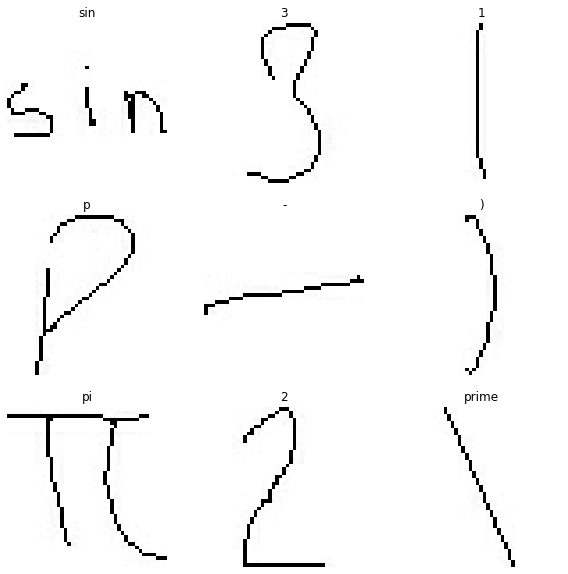

In [95]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    print(images[i].shape)
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [96]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1./255)
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


In [116]:
model1 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])
model1.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_34 (Rescaling)    (None, 45, 45, 3)         0         
                                                                 
 conv2d_64 (Conv2D)          (None, 43, 43, 32)        896       
                                                                 
 conv2d_65 (Conv2D)          (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 20, 20, 64)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 flatten_21 (Flatten)        (None, 25600)             0         
                                                     

In [98]:

model = Sequential()
model.add(Rescaling(1./255, input_shape = (45,45,3)))
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])


In [99]:
model.get_config()

{'name': 'sequential_29',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 45, 45, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'rescaling_34_input'}},
  {'class_name': 'Rescaling',
   'config': {'name': 'rescaling_34',
    'trainable': True,
    'batch_input_shape': (None, 45, 45, 3),
    'dtype': 'float32',
    'scale': 0.00392156862745098,
    'offset': 0.0}},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d_64',
    'trainable': True,
    'batch_input_shape': (None, 10, 45, 45, 1),
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'valid',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None

In [100]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_34 (Rescaling)    (None, 45, 45, 3)         0         
                                                                 
 conv2d_64 (Conv2D)          (None, 43, 43, 32)        896       
                                                                 
 conv2d_65 (Conv2D)          (None, 41, 41, 64)        18496     
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 20, 20, 64)       0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 flatten_21 (Flatten)        (None, 25600)             0         
                                                     

In [101]:
epochs = 10
hist = model1.fit(train_ds,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=val_ds)


Epoch 1/10
2350/2350 [==============================] - 253s 107ms/step - loss: 0.5334 - accuracy: 0.8595 - val_loss: 0.2329 - val_accuracy: 0.9328
Epoch 2/10
2350/2350 [==============================] - 189s 80ms/step - loss: 0.1987 - accuracy: 0.9404 - val_loss: 0.1619 - val_accuracy: 0.9520
Epoch 3/10
2350/2350 [==============================] - 182s 78ms/step - loss: 0.1396 - accuracy: 0.9568 - val_loss: 0.1275 - val_accuracy: 0.9610
Epoch 4/10
2350/2350 [==============================] - 181s 77ms/step - loss: 0.1080 - accuracy: 0.9658 - val_loss: 0.1064 - val_accuracy: 0.9669
Epoch 5/10
2350/2350 [==============================] - 173s 74ms/step - loss: 0.0867 - accuracy: 0.9717 - val_loss: 0.0961 - val_accuracy: 0.9698
Epoch 6/10
2350/2350 [==============================] - 176s 75ms/step - loss: 0.0738 - accuracy: 0.9756 - val_loss: 0.0864 - val_accuracy: 0.9716
Epoch 7/10
2350/2350 [==============================] - 173s 74ms/step - loss: 0.0646 - accuracy: 0.9786 - val_loss: 

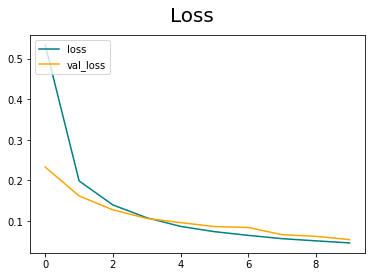

In [103]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

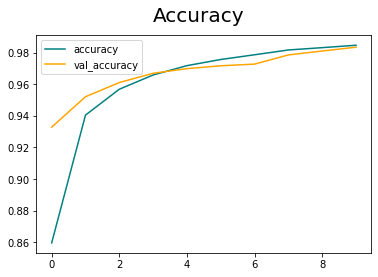

In [104]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [106]:
score = model1.evaluate(val_ds, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

588/588 [==============================] - 9s 15ms/step - loss: 0.0541 - accuracy: 0.9834
Test loss: 0.05413392186164856
Test accuracy: 0.9833763241767883


In [114]:
model1.save('model.h5')